Saving twitter_training.csv to twitter_training (2).csv


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipython-input-12-2877354564.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='pastel')


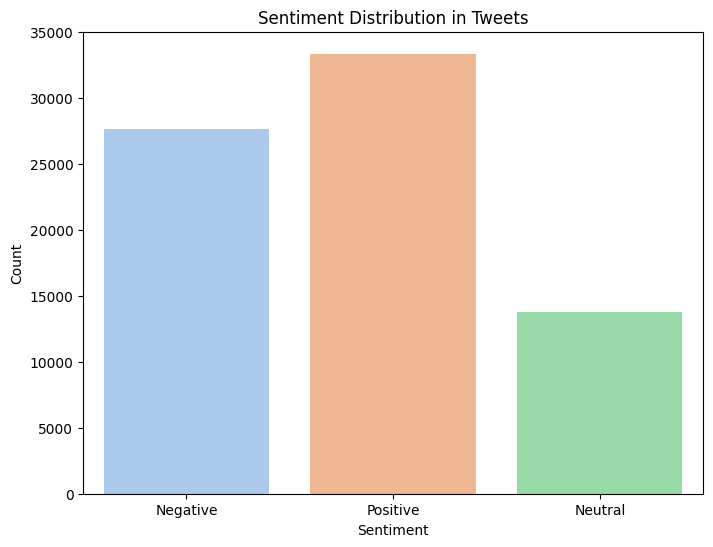

/tmp/ipython-input-12-2877354564.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order=['Positive', 'Negative', 'Neutral'], palette='pastel')


<Axes: xlabel='sentiment', ylabel='count'>

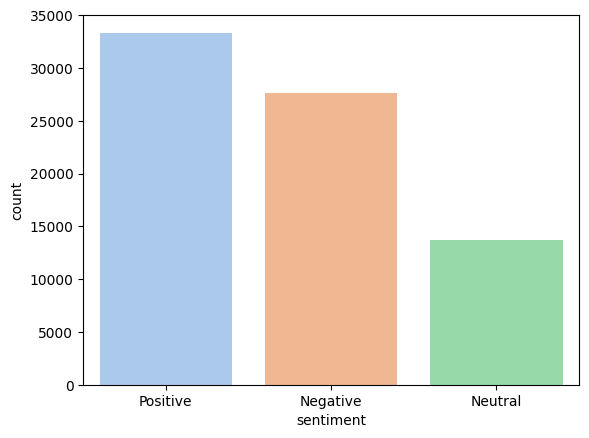

In [ ]:
from google.colab import files
uploaded = files.upload()

# TASK 04 – Sentiment Analysis on Twitter Data
# Uploading and setting up environment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER (only once)
nltk.download('vader_lexicon')

# Load CSV without header and rename columns
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Topic', 'Label', 'Tweet']

# Clean the tweet text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text

df['clean_text'] = df['Tweet'].apply(clean_text)

# Apply VADER Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['scores'] = df['clean_text'].apply(lambda text: sid.polarity_scores(text))
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Create sentiment labels based on compound score
df['sentiment'] = df['compound'].apply(
    lambda c: 'Positive' if c >= 0.05 else ('Negative' if c <= -0.05 else 'Neutral'))
# Sentiment Distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

sns.countplot(x='sentiment', data=df, order=['Positive', 'Negative', 'Neutral'], palette='pastel')